In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sys
import os
os.getcwd()

'c:\\Users\\KULKARM\\Documents\\Machine Learning'

In [3]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("./download.csv")

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
data.shape

(730, 16)

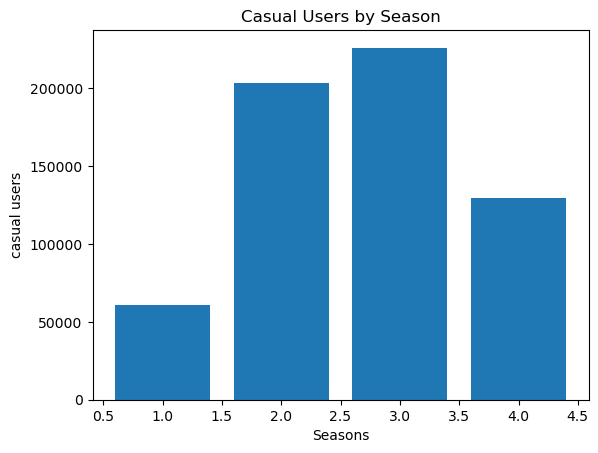

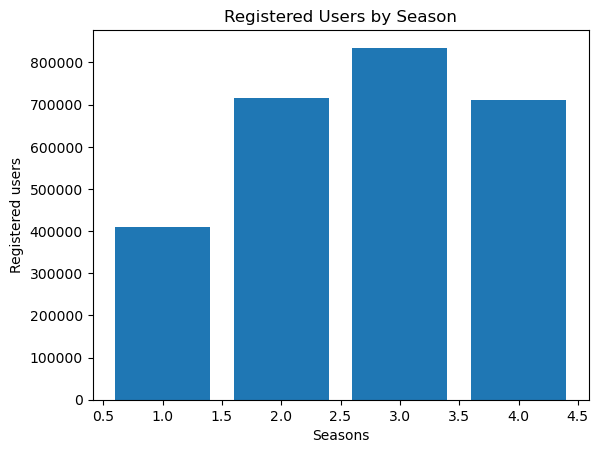

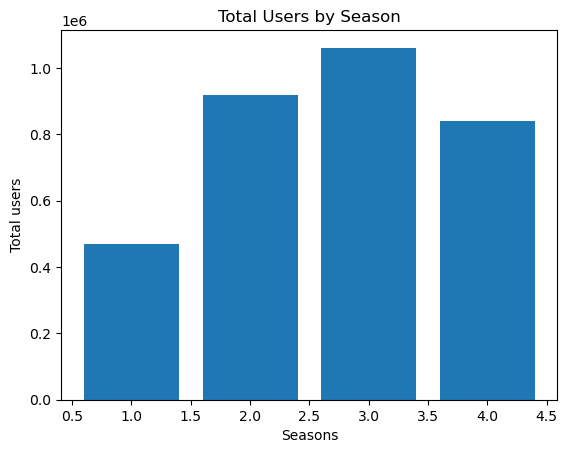

In [8]:
season_casual = data.groupby('season')['casual'].sum().reset_index()
plt.bar(season_casual['season'], season_casual['casual'])
plt.title('Casual Users by Season')
plt.xlabel('Seasons')
plt.ylabel('casual users')
plt.show()
season_casual = data.groupby('season')['registered'].sum().reset_index()
plt.bar(season_casual['season'], season_casual['registered'])
plt.title('Registered Users by Season')
plt.xlabel('Seasons')
plt.ylabel('Registered users')
plt.show()
season_casual = data.groupby('season')['cnt'].sum().reset_index()
plt.bar(season_casual['season'], season_casual['cnt'])
plt.title('Total Users by Season')
plt.xlabel('Seasons')
plt.ylabel('Total users')
plt.show()


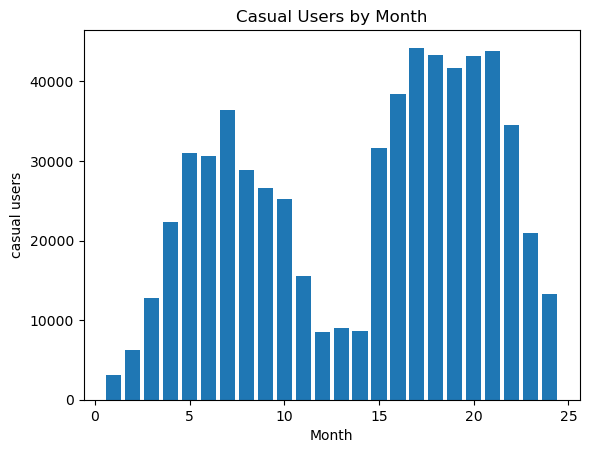

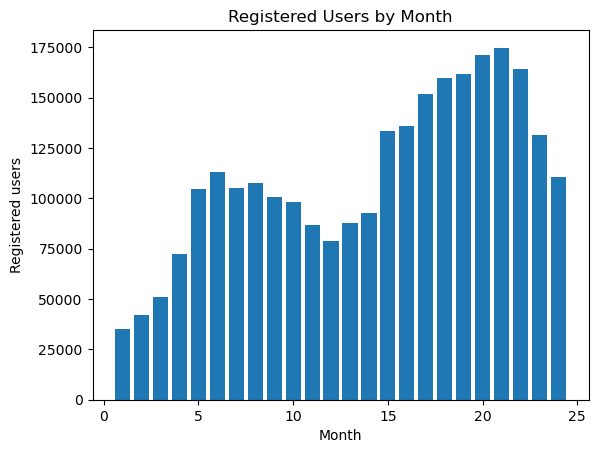

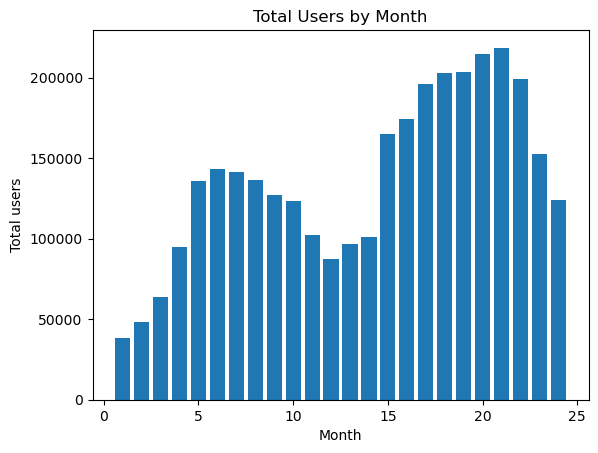

In [9]:
data['month'] = data['yr'] * 12 + data['mnth']
season_casual = data.groupby('month')['casual'].sum().reset_index()
plt.bar(season_casual['month'], season_casual['casual'])
plt.title('Casual Users by Month')
plt.xlabel('Month')
plt.ylabel('casual users')
plt.show()
season_casual = data.groupby('month')['registered'].sum().reset_index()
plt.bar(season_casual['month'], season_casual['registered'])
plt.title('Registered Users by Month')
plt.xlabel('Month')
plt.ylabel('Registered users')
plt.show()
season_casual = data.groupby('month')['cnt'].sum().reset_index()
plt.bar(season_casual['month'], season_casual['cnt'])
plt.title('Total Users by Month')
plt.xlabel('Month')
plt.ylabel('Total users')
plt.show()
data = data.drop(columns=['month'])

In [10]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


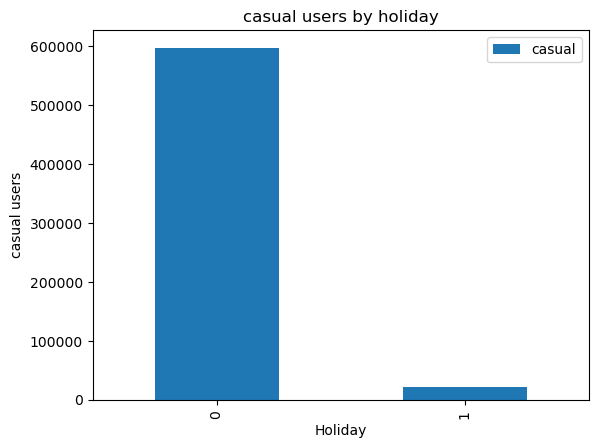

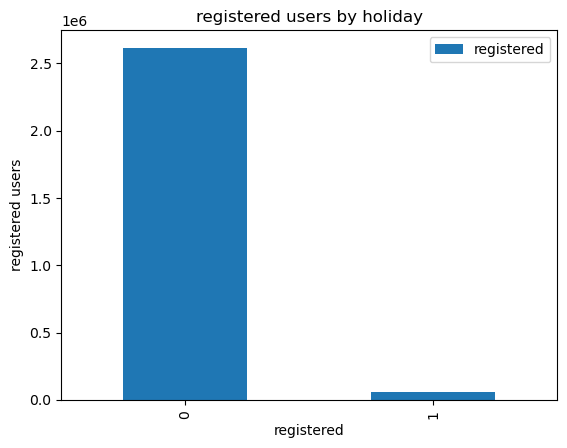

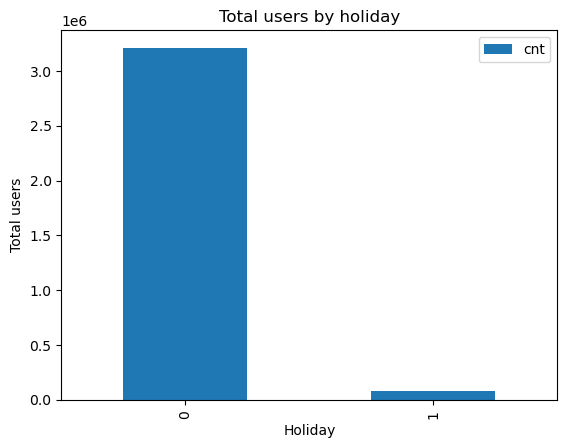

In [11]:
holiday_casual = data.groupby('holiday')['casual'].sum().reset_index()
holiday_casual.plot(x='holiday', y='casual', kind='bar')
plt.xlabel('Holiday')
plt.ylabel('casual users')
plt.title('casual users by holiday')
plt.show()
holiday_casual = data.groupby('holiday')['registered'].sum().reset_index()
holiday_casual.plot(x='holiday', y='registered', kind='bar')
plt.xlabel('registered')
plt.ylabel('registered users')
plt.title('registered users by holiday')
plt.show()
holiday_casual = data.groupby('holiday')['cnt'].sum().reset_index()
holiday_casual.plot(x='holiday', y='cnt', kind='bar')
plt.xlabel('Holiday')
plt.ylabel('Total users')
plt.title('Total users by holiday')
plt.show()

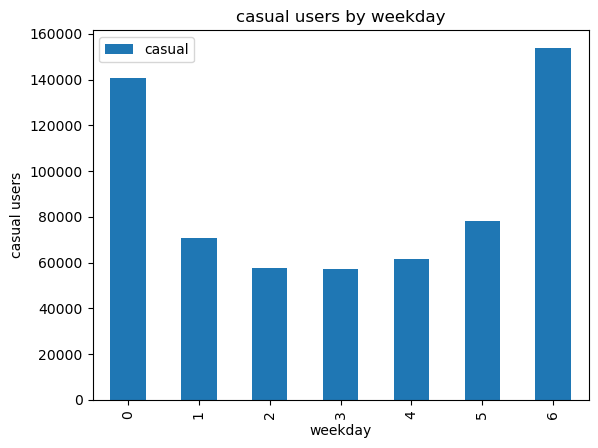

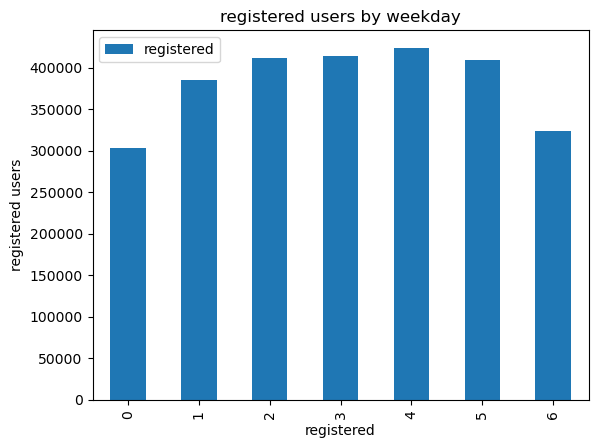

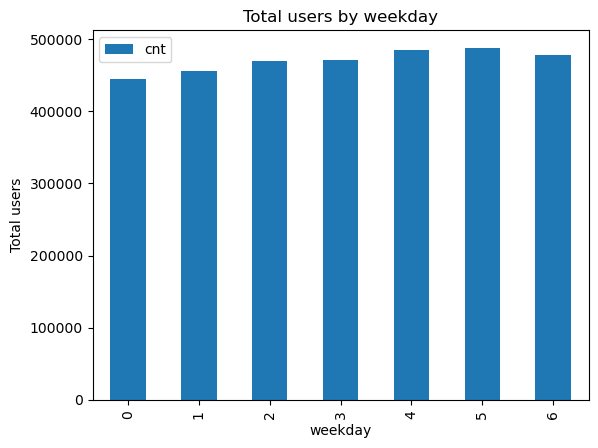

In [12]:
holiday_casual = data.groupby('weekday')['casual'].sum().reset_index()
holiday_casual.plot(x='weekday', y='casual', kind='bar')
plt.xlabel('weekday')
plt.ylabel('casual users')
plt.title('casual users by weekday')
plt.show()
holiday_casual = data.groupby('weekday')['registered'].sum().reset_index()
holiday_casual.plot(x='weekday', y='registered', kind='bar')
plt.xlabel('registered')
plt.ylabel('registered users')
plt.title('registered users by weekday')
plt.show()
holiday_casual = data.groupby('weekday')['cnt'].sum().reset_index()
holiday_casual.plot(x='weekday', y='cnt', kind='bar')
plt.xlabel('weekday')
plt.ylabel('Total users')
plt.title('Total users by weekday')
plt.show()

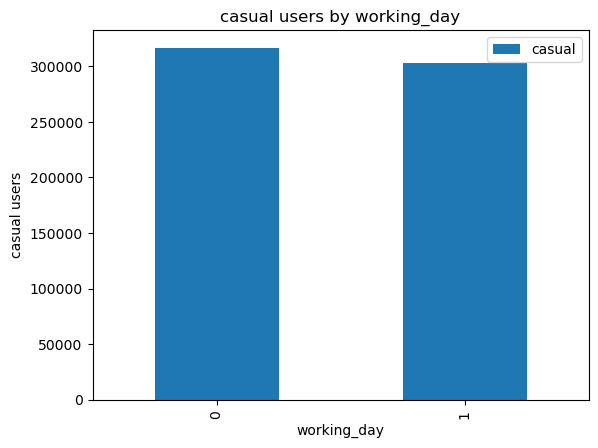

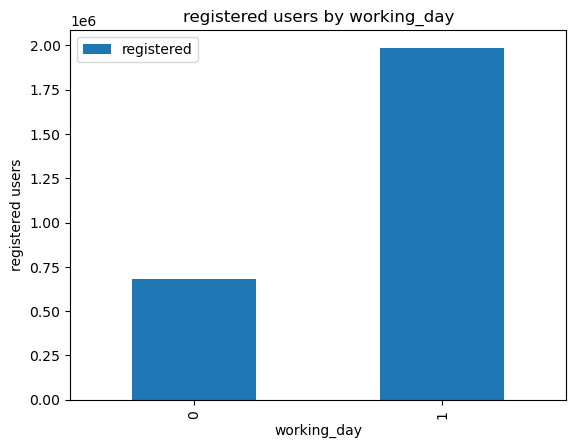

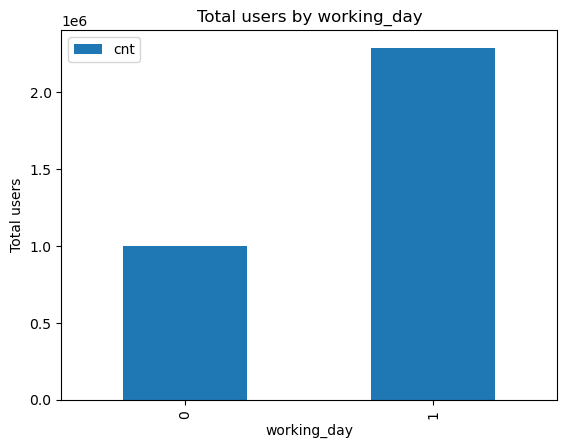

In [13]:
holiday_casual = data.groupby('workingday')['casual'].sum().reset_index()
holiday_casual.plot(x='workingday', y='casual', kind='bar')
plt.xlabel('working_day')
plt.ylabel('casual users')
plt.title('casual users by working_day')
plt.show()
holiday_casual = data.groupby('workingday')['registered'].sum().reset_index()
holiday_casual.plot(x='workingday', y='registered', kind='bar')
plt.xlabel('working_day')
plt.ylabel('registered users')
plt.title('registered users by working_day')
plt.show()
holiday_casual = data.groupby('workingday')['cnt'].sum().reset_index()
holiday_casual.plot(x='workingday', y='cnt', kind='bar')
plt.xlabel('working_day')
plt.ylabel('Total users')
plt.title('Total users by working_day')
plt.show()

In [14]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


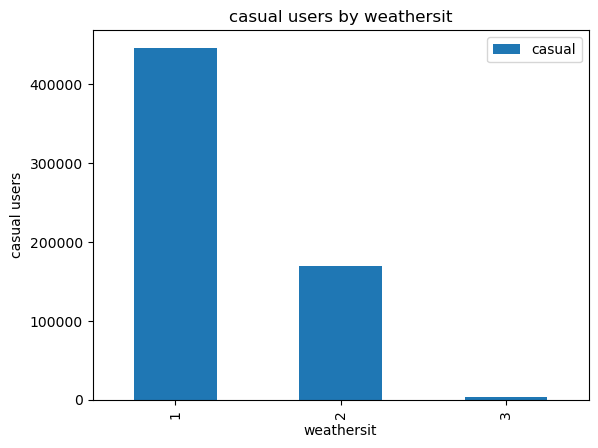

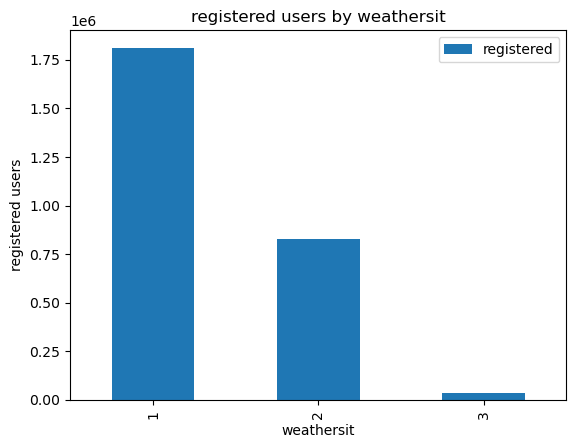

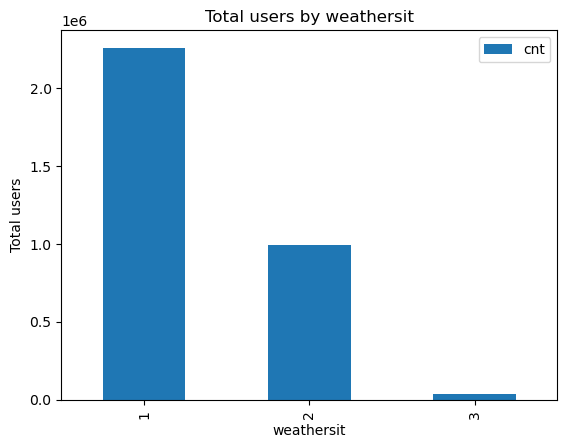

In [15]:
holiday_casual = data.groupby('weathersit')['casual'].sum().reset_index()
holiday_casual.plot(x='weathersit', y='casual', kind='bar')
plt.xlabel('weathersit')
plt.ylabel('casual users')
plt.title('casual users by weathersit')
plt.show()
holiday_casual = data.groupby('weathersit')['registered'].sum().reset_index()
holiday_casual.plot(x='weathersit', y='registered', kind='bar')
plt.xlabel('weathersit')
plt.ylabel('registered users')
plt.title('registered users by weathersit')
plt.show()
holiday_casual = data.groupby('weathersit')['cnt'].sum().reset_index()
holiday_casual.plot(x='weathersit', y='cnt', kind='bar')
plt.xlabel('weathersit')
plt.ylabel('Total users')
plt.title('Total users by weathersit')
plt.show()

<Axes: xlabel='temp', ylabel='cnt'>

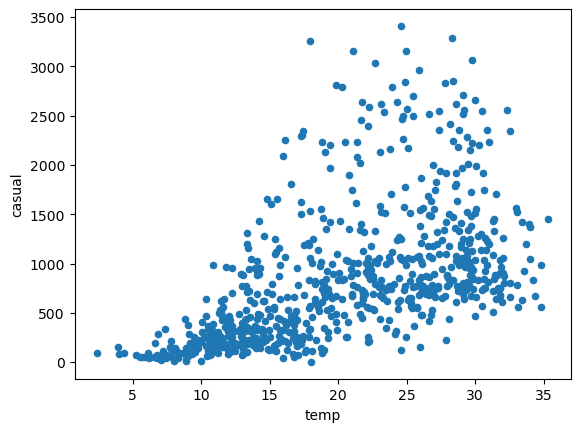

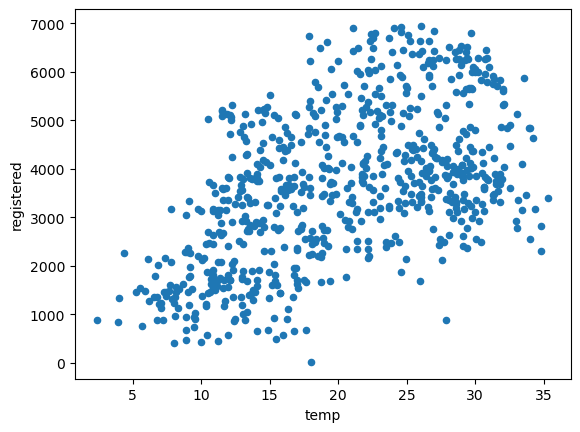

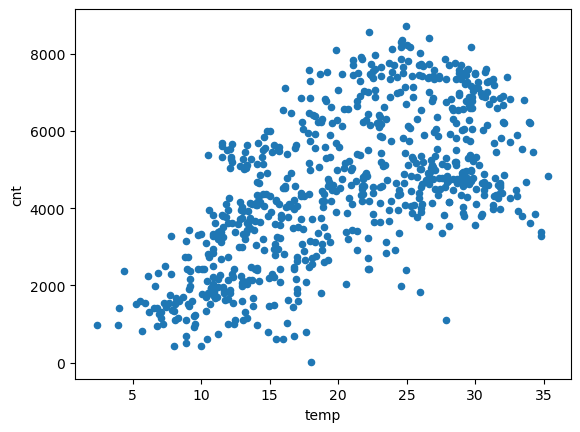

In [16]:
data.plot(x='temp', y='casual', kind='scatter')
data.plot(x='temp', y='registered', kind='scatter')
data.plot(x='temp', y='cnt', kind='scatter')

<Axes: xlabel='atemp', ylabel='cnt'>

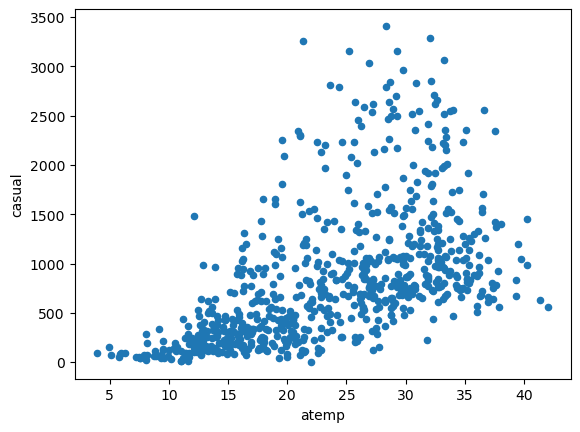

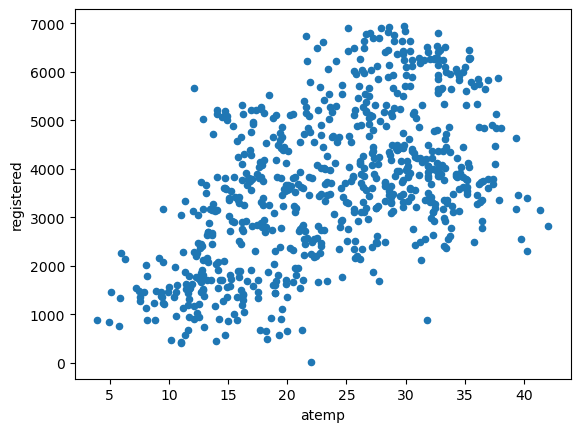

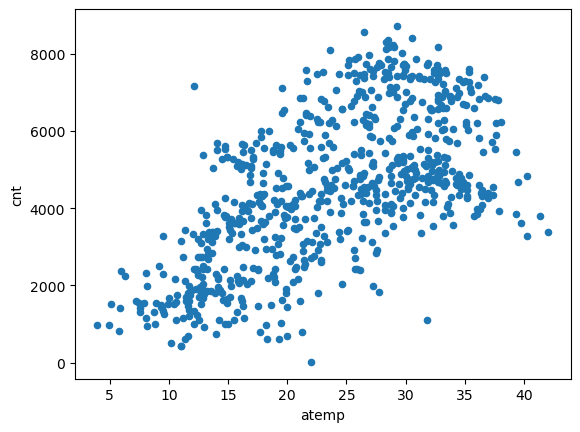

In [17]:
data.plot(x='atemp', y='casual', kind='scatter')
data.plot(x='atemp', y='registered', kind='scatter')
data.plot(x='atemp', y='cnt', kind='scatter')

<Axes: xlabel='hum', ylabel='cnt'>

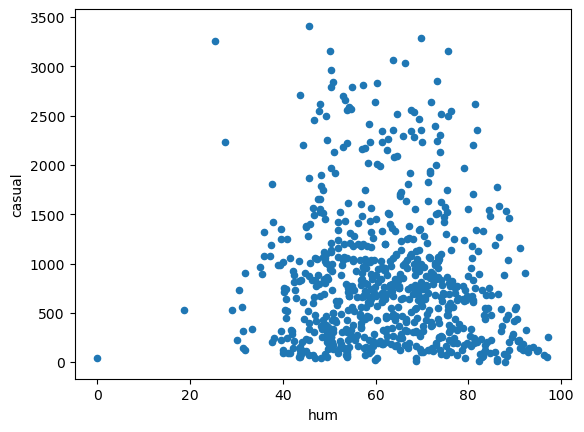

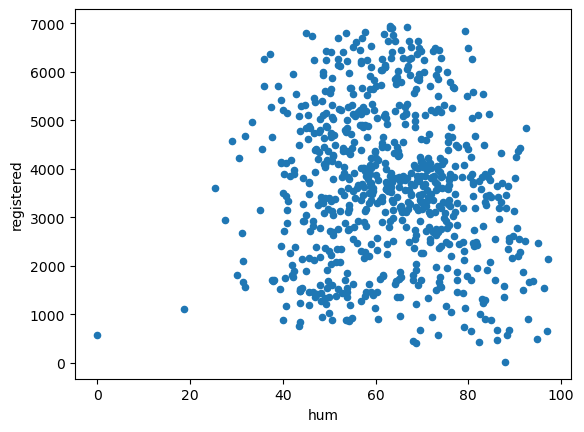

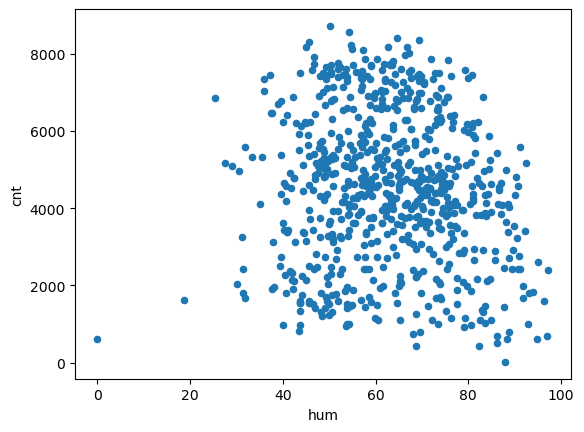

In [18]:
data.plot(x='hum', y='casual', kind='scatter')
data.plot(x='hum', y='registered', kind='scatter')
data.plot(x='hum', y='cnt', kind='scatter')

<Axes: xlabel='windspeed', ylabel='cnt'>

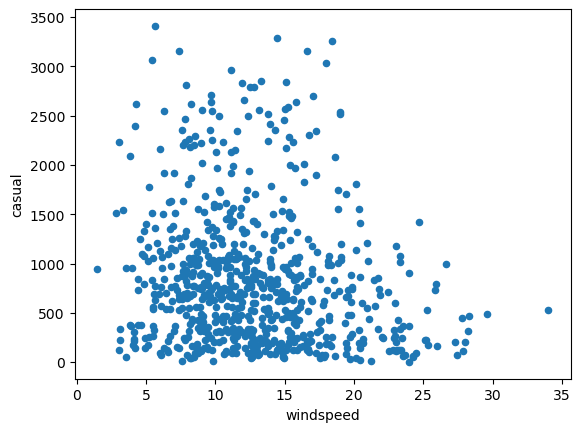

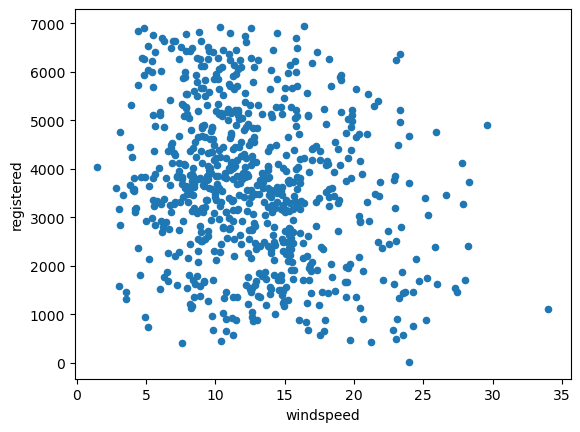

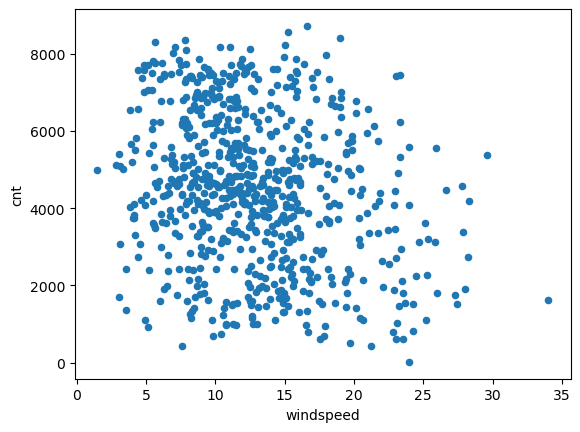

In [19]:
data.plot(x='windspeed', y='casual', kind='scatter')
data.plot(x='windspeed', y='registered', kind='scatter')
data.plot(x='windspeed', y='cnt', kind='scatter')

Encode Categorical data. Need not encode categorical data having a specific preference.

In [20]:
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<H3>Clean the data.</H3>
<p>
1. Humidity is 0 for one instance. This is an outlier. For this instance, Season = 1, weather situation = 3. 

-- To Clean humidity column, data is filtered out by Season and weathersituation. Humidity with value 0 is filled with NA. Mean of the rest of the values is taken to fill out humidity value.
</p>
<p>
2. The data contains the column instant. This column can be dropped as it is used to represent just the index of the row. It may introduce noise if used.
</p>
<p>
3. dteday can be dropped out as we already have data about year, month and weekday.
</p>
<p>
4. Next we can combine yr and month. This can be done using Mnth = yr * 12 + Mnth. We need to drop out Yr column after this. This is done to capture seasonal growth year on year.
</p>
<p>
5. Columns Season, holiday, weekday and workingday are categorical in nature and can be treated same by using one hot encoding.
</p>

In [22]:
data['hum'] = data['hum'].replace(0, np.nan)
data['hum'] = data.groupby(['season', 'weathersit'])['hum'].transform(lambda x: x.fillna(x.mean()))

data = data.drop(columns=['instant', 'dteday'])

data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.875544,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.061566,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.052075,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.708350,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,73.031275,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [23]:
data['mnth'] = data['yr'] * 12 + data['mnth']

In [24]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,12.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.875544,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,6.924837,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.061566,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.052075,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,12.500000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.708350,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,19.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,73.031275,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,24.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [25]:
data = pd.get_dummies(data, columns=['season', 'workingday', 'weekday', 'holiday'], drop_first=True)

In [26]:
pd.set_option('display.max_columns', None)
data.head()

,yr,mnth,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,workingday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday_1
0,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,False,False,False,False,False,False,False,False,False,True,False
1,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,False,False,False,False,False,False,False,False,False,False,False
2,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,False,True,True,False,False,False,False,False,False
3,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,False,False,True,False,True,False,False,False,False,False
4,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,False,False,True,False,False,True,False,False,False,False


Separate dependant and independant variables

In [27]:
x = data.drop(columns=['casual', 'registered', 'cnt'])
x.shape

(730, 18)

In [28]:
y = data[['casual', 'registered', 'cnt']]
y.shape

(730, 3)

Separate between training and testing data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


check shapes of all data

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(584, 18)
(146, 18)
(584, 3)
(146, 3)


Train the model.

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<H3> Testing the model.</H3>
<p> Here since for weather situation 4, which is really harsh weather, there are no sales we would explicitly predict it as 0. For other data a trained model can be used.</p> 

In [37]:
y_Pred = model.predict(x_test)
y_Pred_train = model.predict(x_train)

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
r2Score_Pred = r2_score(y_test, y_Pred)
r2Score_Pred

0.8178099982726345

In [40]:
r2Score_Train = r2_score(y_train, y_Pred_train)
r2Score_Train


0.7831154691924627

In [41]:
mean_squared_error(y_train, y_Pred_train)

429396.72736286354

In [42]:
mean_squared_error(y_test, y_Pred)


303893.5527902858